# Working through masked arrays

= as a way to remove the nans in arrays

In [1]:
# While in argo environment: Import necessary packages for this notebook 
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline 
import glob
#!python -m pip install "dask[complete]" 
import netCDF4
import glob

### Read in data
This reads in the low res data I downloaded in early 2021, the Dec 2021 snapshot data and some high res data I have hanging out in my raw data folder(...)

In [2]:
float_id = '5904471' # '9094'/5904471 '9099' '7652' '9125'
f_id21='5904471'
rootdirLR = '../data/raw/LowRes/'
rootdir21 = '../data/raw/SOCCOM_HiResQC_LIAR_21Dec2021_netcdf/'
rootdir = '../data/raw/'
fd = xr.open_mfdataset(rootdir + float_id + '*.nc') #SOOCNQC #open_dataset doesn't work??
fd21=xr.open_mfdataset(rootdir21 + f_id21 + '*.nc') #SOOCNQC
#fdLR = xr.open_mfdataset(rootdirLR + float_id + '*.nc') #SOOCNQC

#xr.open_mfdataset?
#JULD = pd.to_datetime(fd.JULD.values)
#JULD21 = pd.to_datetime(fd21.JULD.values)

files = sorted(glob.glob(rootdir21+"*"+f_id21+"*.nc"))
print(files)

['../data/raw/SOCCOM_HiResQC_LIAR_21Dec2021_netcdf\\5904471_HRQC.nc']


In [3]:
print(fd21) #fd21 # fdLR

<xarray.Dataset>
Dimensions:              (N_PROF: 159, N_LEVELS: 558, NPARAMETER: 46)
Dimensions without coordinates: N_PROF, N_LEVELS, NPARAMETER
Data variables: (12/66)
    Cruise               |S11 ...
    Station              (N_PROF) int32 dask.array<chunksize=(159,), meta=np.ndarray>
    Lon                  (N_PROF) float64 dask.array<chunksize=(159,), meta=np.ndarray>
    Lat                  (N_PROF) float64 dask.array<chunksize=(159,), meta=np.ndarray>
    Lat_QF               (N_PROF) |S1 dask.array<chunksize=(159,), meta=np.ndarray>
    Lat_QFA              (N_PROF) float64 dask.array<chunksize=(159,), meta=np.ndarray>
    ...                   ...
    Type                 |S1 ...
    mon_day_yr           (N_PROF) |S10 dask.array<chunksize=(159,), meta=np.ndarray>
    hh_mm                (N_PROF) |S5 dask.array<chunksize=(159,), meta=np.ndarray>
    Parameters           (NPARAMETER) |S19 dask.array<chunksize=(46,), meta=np.ndarray>
    JULD                 (N_PROF) dateti

#### Non-masked array method for removing nans
Find either the nan values or the non-nan values.
Then, like with matlab, make a variable where the non-nan values are selected. 

In [4]:
#print(np.array(fd.Chl_a[0]))
#print(np.array(fd.Chl_a_QFA[0])) # not sure about these numbers...
chl_test=np.isfinite(np.array(fd.Chl_a[1])) #non-nan values in profile
#print(chl_test)

chl_test2=np.array(fd.Chl_a[1])[chl_test] #keeping only the non-nan values in Chl_a
print(chl_test2)


[ 0.      0.      0.      0.      0.      0.      0.0036  0.0036  0.
  0.      0.      0.0036  0.0036  0.0036  0.0036  0.0036 -0.0036  0.0036
  0.0072  0.0036  0.0036  0.0036  0.      0.0036  0.      0.      0.0072
  0.0072  0.0036  0.0036  0.      0.      0.0072  0.0072  0.0036  0.
  0.0036  0.0036  0.0036  0.      0.      0.0036  0.0036  0.0036  0.0036
  0.0144  0.0252  0.0648  0.0972  0.1152  0.1476  0.1872  0.2628  0.3636
  0.4248  0.864   0.6984  0.5544  0.9432  0.5724  0.6552  0.576   0.576
  0.4428  0.45    0.5184  0.5148]


#### Masked array (1) - isfinite

In [5]:
chl_a_masked=np.ma.array(fd.Chl_a[0])
#print(chl_a_masked)
#np.ma.isMaskedArray(chl_a_masked)
chl_a_masked.giraffe=(np.isfinite(chl_a_masked)) # the .name (in this case, 'giraffe') can be anything - can be mask, or another name
#print(chl_a_masked.mask)
t1=chl_a_masked
#print(t1.giraffe)
#display(t1.giraffe)
msktest= t1.giraffe
display(np.ma.array(fd.Depth[0]))
depthmaskify=np.ma.array(fd.Depth[0])[msktest] # or chl_a_masked.giraffe would work too instead of msktest = less variables to make 
display(depthmaskify)

masked_array(data=[1576.696, 1478.468, 1380.657, 1282.416, 1184.159,
                   1085.855,  987.781,      nan,      nan,      nan,
                        nan,      nan,      nan,      nan,      nan,
                        nan,      nan,      nan,      nan,      nan,
                        nan,      nan,  939.274,      nan,      nan,
                        nan,      nan,      nan,      nan,      nan,
                        nan,      nan,      nan,      nan,      nan,
                        nan,      nan,      nan,      nan,      nan,
                        nan,      nan,      nan,      nan,      nan,
                        nan,      nan,      nan,  890.41 ,      nan,
                        nan,      nan,      nan,      nan,      nan,
                        nan,      nan,      nan,      nan,      nan,
                        nan,      nan,      nan,      nan,      nan,
                        nan,      nan,      nan,      nan,      nan,
                        nan,      

masked_array(data=[1576.696, 1478.468, 1380.657, 1282.416, 1184.159,
                   1085.855,  987.781,  939.274,  890.41 ,  841.229,
                    792.155,  742.556,  693.024,  643.412,  594.755,
                    545.237,  496.033,  445.958,  397.175,  376.876,
                    357.109,  347.412,  337.735,  327.761,  315.512,
                    306.347,  297.687,  287.888,  278.455,  268.013,
                    258.51 ,  248.394,  238.386,  229.267,  218.714,
                    209.278,  198.852,  188.901,  179.216,  169.62 ,
                    159.647,  147.24 ,  137.811,  129.924,  119.406,
                    110.42 ,  100.277,   92.438,   84.392,   76.741,
                     69.536,   62.726,   56.519,   51.303,   46.779,
                     41.661,   35.711,   30.593,   25.376,   19.99 ,
                     14.535,    8.475],
             mask=False,
       fill_value=1e+20)

#### Masked array (2) - isnan 

In [6]:
chl_a_masked=np.ma.array(fd.Chl_a[0])
chl_a_masked.giraffe=(~np.isnan(chl_a_masked)) 
t1=chl_a_masked
#print(t1.giraffe)
#display(t1.giraffe)
msktest= t1.giraffe
#display(np.ma.array(fd.Depth[0]))
depthmaskify=np.ma.array(fd.Depth[0])[msktest]
display(depthmaskify)

masked_array(data=[1576.696, 1478.468, 1380.657, 1282.416, 1184.159,
                   1085.855,  987.781,  939.274,  890.41 ,  841.229,
                    792.155,  742.556,  693.024,  643.412,  594.755,
                    545.237,  496.033,  445.958,  397.175,  376.876,
                    357.109,  347.412,  337.735,  327.761,  315.512,
                    306.347,  297.687,  287.888,  278.455,  268.013,
                    258.51 ,  248.394,  238.386,  229.267,  218.714,
                    209.278,  198.852,  188.901,  179.216,  169.62 ,
                    159.647,  147.24 ,  137.811,  129.924,  119.406,
                    110.42 ,  100.277,   92.438,   84.392,   76.741,
                     69.536,   62.726,   56.519,   51.303,   46.779,
                     41.661,   35.711,   30.593,   25.376,   19.99 ,
                     14.535,    8.475],
             mask=False,
       fill_value=1e+20)

In [7]:
#depthmaskify=chl_a_masked[chl_a_masked.giraffe]
print(chl_a_masked)
depthmaskify=fd.Chl_a[0,:][chl_a_masked.giraffe]
display(fd.Chl_a[0,:])
display(depthmaskify)


[0.     0.0036 0.     0.0036 0.0036 0.0036 0.0036    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan 0.        nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan 0.        nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan 0.0036    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
 0.0036    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan 0.0036    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    na

<xarray.DataArray 'Chl_a' (N_LEVELS: 558)>
dask.array<getitem, shape=(558,), dtype=float64, chunksize=(558,), chunktype=numpy.ndarray>
Dimensions without coordinates: N_LEVELS
Attributes:
    units:    mg/m^3

<xarray.DataArray 'Chl_a' (N_LEVELS: 62)>
dask.array<getitem, shape=(62,), dtype=float64, chunksize=(62,), chunktype=numpy.ndarray>
Dimensions without coordinates: N_LEVELS
Attributes:
    units:    mg/m^3

## Testing interpolation method from nitrate_drawdown
C-version has added lines that will mask the high res data using the below method if it works (it does)

In [8]:
x_int= np.arange(0, 1600, 5)
yvals_int = []
yvals=fd.Chl_a[:,::-1]
xvals=fd.Depth[:,::-1]
n=1
yvalmasked=np.ma.array(yvals[n,:])
yvalmasked.mask=np.isfinite(yvalmasked)
yvalsclean=yvals[n,:][yvalmasked.mask]
xvalsclean=xvals[n,:][yvalmasked.mask]
yvals_int.append(np.interp(x_int, xvalsclean, yvalsclean))

ytest=np.array(yvals_int)
#np.asarray(xvalsclean)
#print(yvals_int)
#type(yvals_int)
#type(ytest)
#display(xvalsclean)
print(ytest)

[[ 5.14800000e-01  5.14800000e-01  5.16939959e-01  4.73670545e-01
   4.44734950e-01  5.47136790e-01  5.76000000e-01  6.33147127e-01
   5.89686479e-01  8.69098290e-01  6.50737224e-01  6.79741515e-01
   6.16162113e-01  3.76091794e-01  2.83941428e-01  2.08790133e-01
   1.63119108e-01  1.31934375e-01  1.09182169e-01  9.19526853e-02
   6.48487870e-02  4.61701951e-02  2.75067961e-02  2.01123199e-02
   1.43153937e-02  9.02749706e-03  3.73960047e-03  3.60000000e-03
   3.60000000e-03  3.60000000e-03  3.60000000e-03  3.60000000e-03
   3.45658508e-03  1.67281736e-03  0.00000000e+00  0.00000000e+00
   3.14451538e-04  2.05560070e-03  3.60000000e-03  3.60000000e-03
   3.60000000e-03  3.60000000e-03  3.15257353e-03  1.31433824e-03
   5.80776633e-04  2.61858938e-03  4.39151752e-03  5.91836458e-03
   7.20000000e-03  7.20000000e-03  6.50933786e-03  2.68930390e-03
   0.00000000e+00  0.00000000e+00  5.37708831e-04  2.32768496e-03
   3.60000000e-03  3.60000000e-03  4.38584829e-03  6.22108483e-03
   7.20000

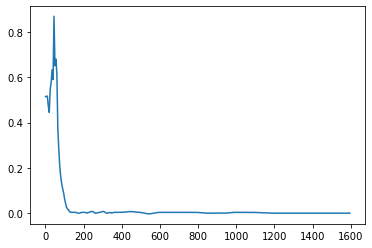

In [9]:
# Quick Timeseries Profile plot of Temperature

#x_int.shape
ytest.shape
plt.plot(x_int,ytest.T)



## QC flags

In [10]:
fd.Depth_QF[0].values.astype(float)

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## calculating interpolation from both scripts to compare


## von Berg method - i.e. nitrate_drawdown_C-version


In [11]:
#interpolate the data onto the standard depth grid given by x_int
def interpolate(x_int, xvals, yvals):
    yvals_int = []
    for n in range(0, len(yvals)): # len(yvals) = profile number
        if highres:
            yvalmasked=np.ma.array(yvals[n,:])
            yvalmasked.mask=np.isfinite(yvalmasked)
            yvalsclean=yvals[n,:][yvalmasked.mask]
            xvalsclean=xvals[n,:][yvalmasked.mask]
            yvals_int.append(np.interp(x_int, xvalsclean, yvalsclean))
        else:
            yvals_int.append(np.interp(x_int, xvals[n, :], yvals[n, :]))
    #convert the interpolated data from a list to numpy array
    return np.asarray(yvals_int)

In [12]:
zi = np.arange(0, 1600, 5) # 5 = 320 depth intervals between 0m to 1595m
highres=True
nitr_int_21 = interpolate(zi, fd21.Depth[:, ::-1], fd21.Chl_a[:, ::-1]) # interpolate nitrate values across zi depth intervals for all 188 profiles # ::-1 sets stride to -1 intervals
nitr_int = interpolate(zi, fd.Depth[:, ::-1], fd.Chl_a[:, ::-1]) # interpolate nitrate values across zi depth intervals for all 188 profiles # ::-1 sets stride to -1 intervals

In [13]:
print(len(nitr_int))
print(len(zi))

159
320


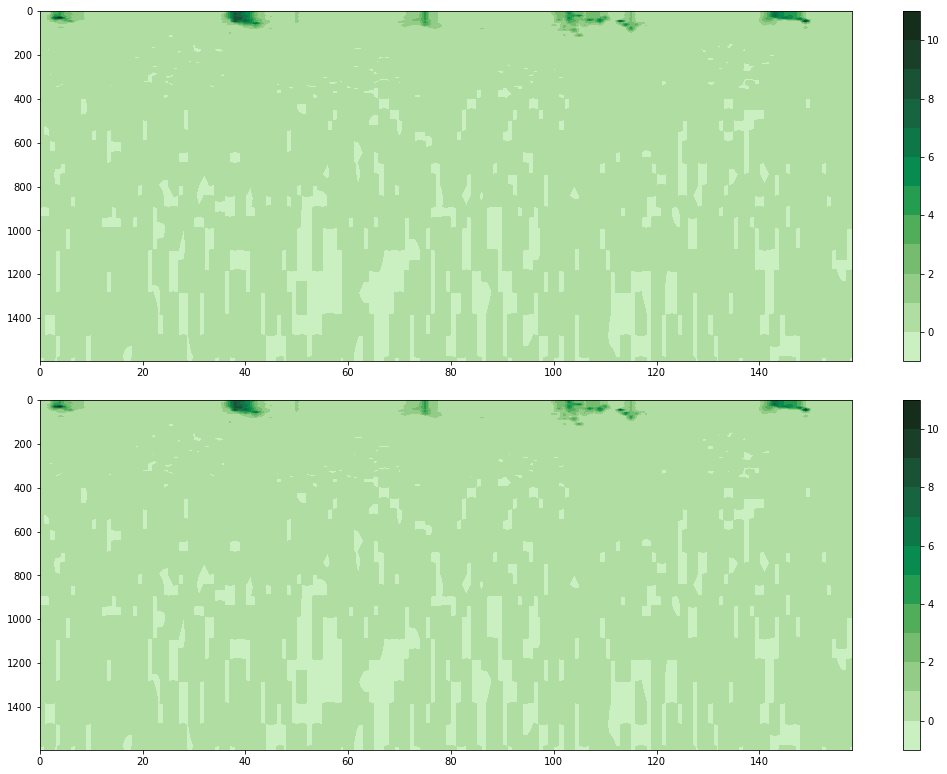

In [17]:
import cmocean
fig = plt.figure(figsize = (30,18))
ax0 = fig.add_axes([0.07,0.35,0.47,0.27])
num=np.arange(0,len(nitr_int),1)
cfT=ax0.contourf(num,zi,nitr_int.T,10, cmap = cmocean.cm.algae)
plt.gca().invert_yaxis()
cb = fig.colorbar(cfT)

ax1 = fig.add_axes([0.07,0.05,0.47,0.27])
cfT21=ax1.contourf(num,zi,nitr_int_21.T,10, cmap = cmocean.cm.algae)
plt.gca().invert_yaxis()
cb = fig.colorbar(cfT21)

#diff_=nitr_int_21-nitr_int
#sumdif=np.nansum(diff_)
#print(sumdif) # no difference between the random files I have 

## Bieito's method

In [15]:
from FromBieito.soccom_functions import *
FLOAT = grids_one_buoy(files[0],display_info = False, DO_ml_crit = 2.5, clear_short = True)

C:\Users\ccd1n18\OneDrive - University of Southampton\PhD\Projects\net_community_production\notebooks\FromBieito\soccom_functions.py:338: RuntimeWarning: Mean of empty slice
  self.gr["LT"][j,i] = np.nanmean(disp[jj]**2)**0.5


(159,)
(401,)
(401, 159)
0.0


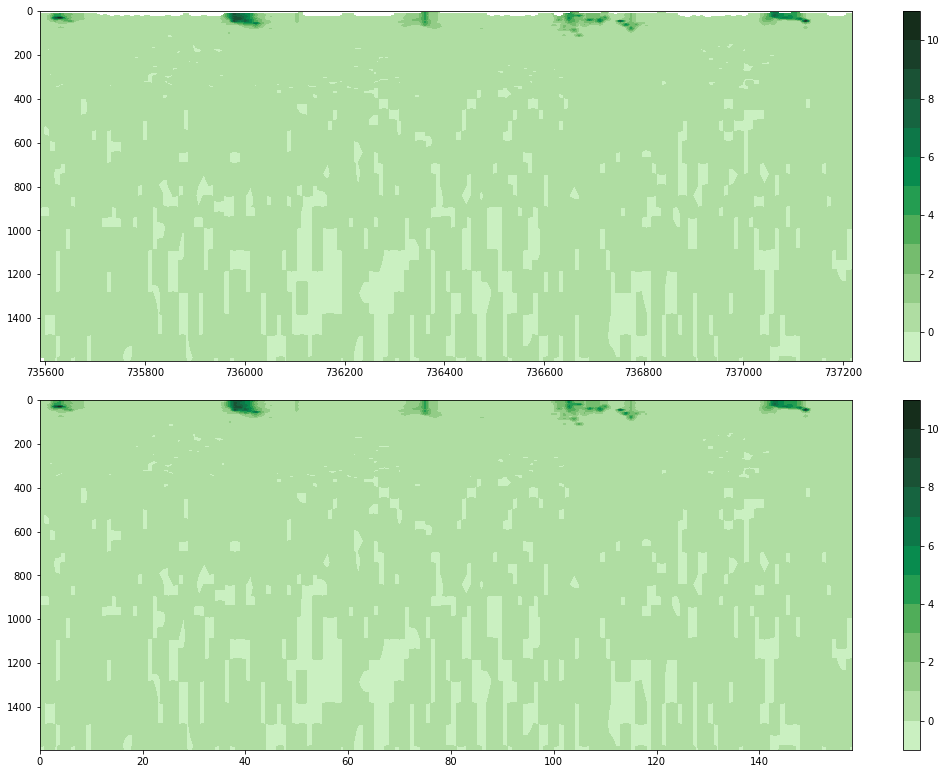

In [18]:
fig = plt.figure(figsize = (30,18))
ax0 = fig.add_axes([0.07,0.35,0.47,0.27])
#num=np.arange(1,234,1)
print(FLOAT.gr["date"].shape)
print(FLOAT.gr["depth"].shape)
print(FLOAT.gr["Chl_a"].shape)
cfT=ax0.contourf(FLOAT.gr["date"],FLOAT.gr["depth"][0:320],FLOAT.gr["Chl_a"][0:320],10, cmap = cmocean.cm.algae)
plt.gca().invert_yaxis()
cb = fig.colorbar(cfT)

ax1 = fig.add_axes([0.07,0.05,0.47,0.27])
cfT21=ax1.contourf(num,zi,nitr_int_21.T,10, cmap = cmocean.cm.algae)
plt.gca().invert_yaxis()
cb = fig.colorbar(cfT21)

diff_vBB=nitr_int_21.T-FLOAT.gr["Chl_a"][0:320,:]
sumdif_vBB=np.nansum(diff_vBB)
print(sumdif_vBB) # no difference between the two interpolation methods except channing's interpolates to the surface and Bieito's doesnt

#print(FLOAT.gr["Chl_a"][0:320,0])
#print(nitr_int_21.T[:,0])
#print(diff_vBB[:,0])

## Now compare intergration 
Interpolation was actually the same, so now see if different ways of integrating values differ
If they do, need to think about which is better - if nitrate_drawdown trapezoidal method is better, then could potentially work that into Bieto's code so as to keep the MLD values that are calculated in B's code

### von Berg/Prend/nitrate_drawdown

In [19]:
# calculate the vertically integrated data column inventory using the composite trapezoidal rule
def integrate(zi, data, depth_range):
    n_profs = len(data)
    zi_start = abs(zi - depth_range[0]).argmin() # find location of start depth
    zi_end =  abs(zi - depth_range[1]).argmin() # find location of end depth
    zi_struct = np.ones((n_profs, 1)) * zi[zi_start : zi_end] # add +1 to get the 200m value
    data = data[:, zi_start : zi_end] # add +1 to get the 200m value
    col_inv = []
    for n in range(0, len(data)):
        col_inv.append(np.trapz(data[n,:][~np.isnan(data[n,:])], zi_struct[n,:][~np.isnan(data[n,:])]))
    return col_inv

In [20]:
upperlim=25
lowerlim=200
nitr = np.array(integrate(zi, nitr_int_21, [upperlim, lowerlim])) # integrate interpolated nitrate values between 25m-200m 

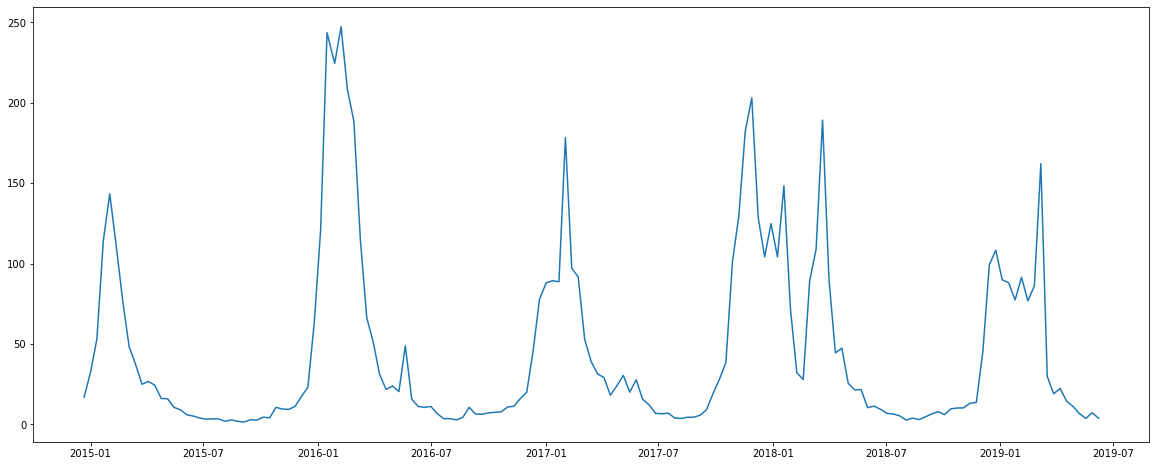

In [21]:
JULD = pd.to_datetime(fd.JULD.values)
JULD21 = pd.to_datetime(fd21.JULD.values)

fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(JULD21, nitr)

thoughts to remember for later:
* calculate total chl over austral year and get % under ice
* determine a depth to set as the base and the surface
    * e.g. 25m and 200m
    * or 25m and the deepest MLD seen by float 
        * but if taking means across floats, would want a consistent base depth for better comparison? 
        * or say the regional mean (mean of all the floats for each year) proportion of [chl] under the ice compared to the total [chl] over an annual period within the deepest ML experienced by each float

### Bieito's method

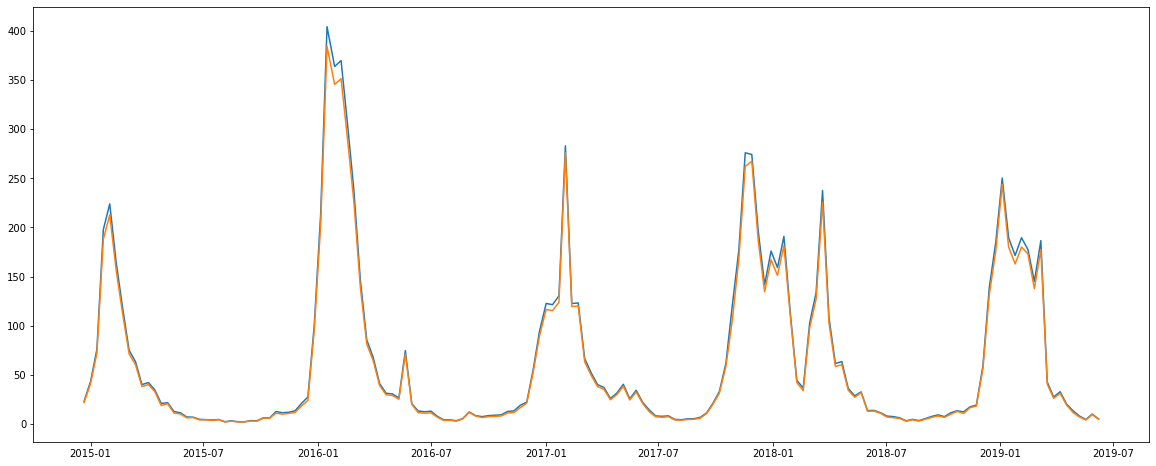

In [22]:
#H = np.nanmax(FLOAT.gr["mld"]) # calculates the maximum ML
##### YOU COULD OVER-RIDE IT BY UN-COMMENTING
H = 200.
dz=5
jh = np.where( FLOAT.gr["depth"]>= H)[0][0] # gets the depth index for the maxmum mixed layer
dint_Chl = np.nanmean(FLOAT.gr["Chl_a"][:jh,:], axis = 0)*H
#or
dint=np.nansum(FLOAT.gr["Chl_a"][:jh,:], axis = 0)*5
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(JULD21,dint_Chl)
ax.plot(JULD21,dint)

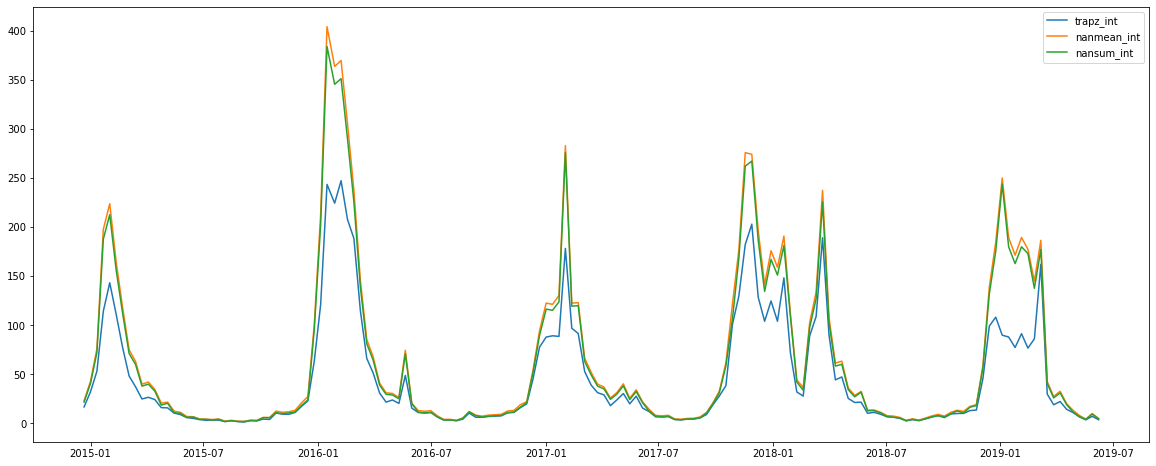

In [23]:
fig, ax = plt.subplots(figsize = (20, 8))
trapz_int,=ax.plot(JULD21, nitr)
nanmean_int,=ax.plot(JULD21,dint_Chl)
nansum_int,=ax.plot(JULD21,dint)
ax.legend([trapz_int, nanmean_int,nansum_int], ['trapz_int', 'nanmean_int', 'nansum_int'])

In [24]:
# Interpolate/get data set up
zi = np.arange(0, 2005, 5) # 5 = 400 depth intervals between 0m to 2000m
    #self.gr["depth"] = np.arange(0,2000+dz,dz)
chl_int = FLOAT.gr["Chl_a"] # interpolated chl values across zi depth intervals for all profiles
#print(chl_int.shape)
#print(chl_int.T.shape)

# Integrate chl - total chl in upper 200m
upperlim=0
lowerlim=200

chl_intr200 = np.array(integrate(zi, chl_int.T, [upperlim, lowerlim])) # integrate interpolated nitrate values between 0m-200m 
#print(chl_intr200)
#len(chl_intr200)

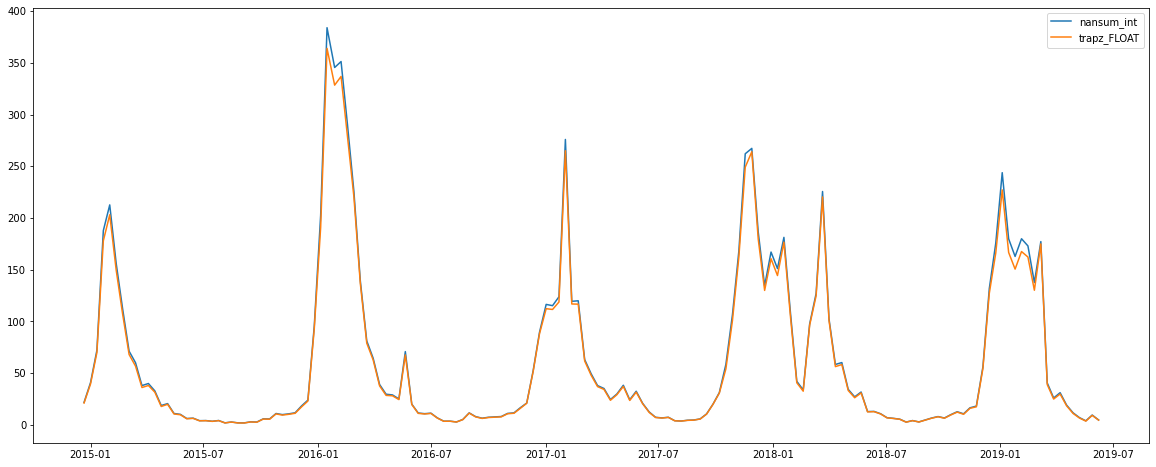

In [40]:
fig, ax = plt.subplots(figsize = (20, 8))
#trapz_int,=ax.plot(JULD21, nitr)
#nanmean_int,=ax.plot(JULD21,dint_Chl)
nansum_int,=ax.plot(JULD21,dint)
trapz_FLOAT,=ax.plot(JULD21,chl_intr200)
ax.legend([nansum_int,trapz_FLOAT], [ 'nansum_int','trapz_FLOAT'])

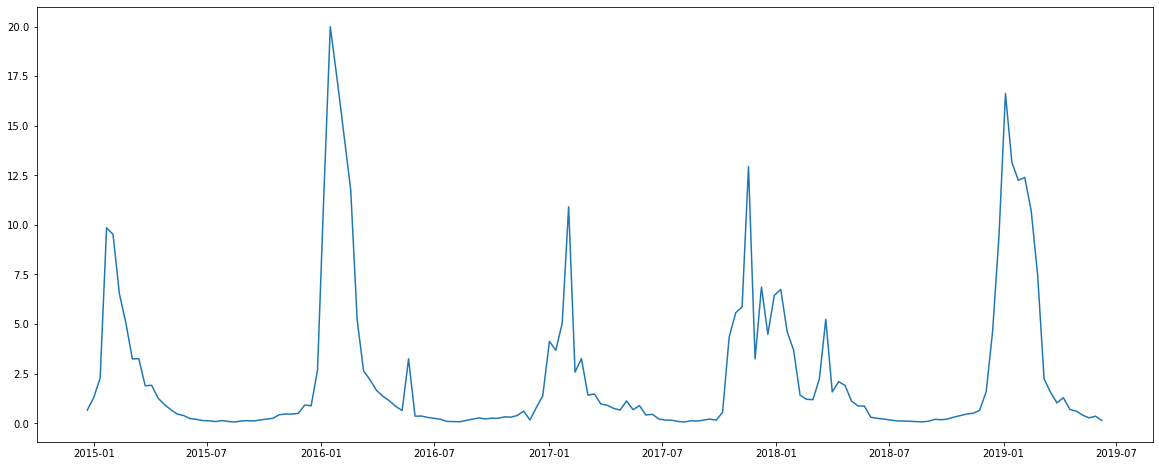

In [26]:
diff_int=dint-chl_intr200
#print(diff_int)
fig, ax = plt.subplots(figsize = (20, 8))
diff_int,=ax.plot(JULD21,diff_int)

In [ ]:
np.trapz?

hmmm

In [27]:
len(FLOAT.gr["mld"])

H2=FLOAT.gr["mld"]
nz= len(H2)
print(nz)

159


In [28]:
dint_chla = np.full( nz, np.nan )
print(dint_chla)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


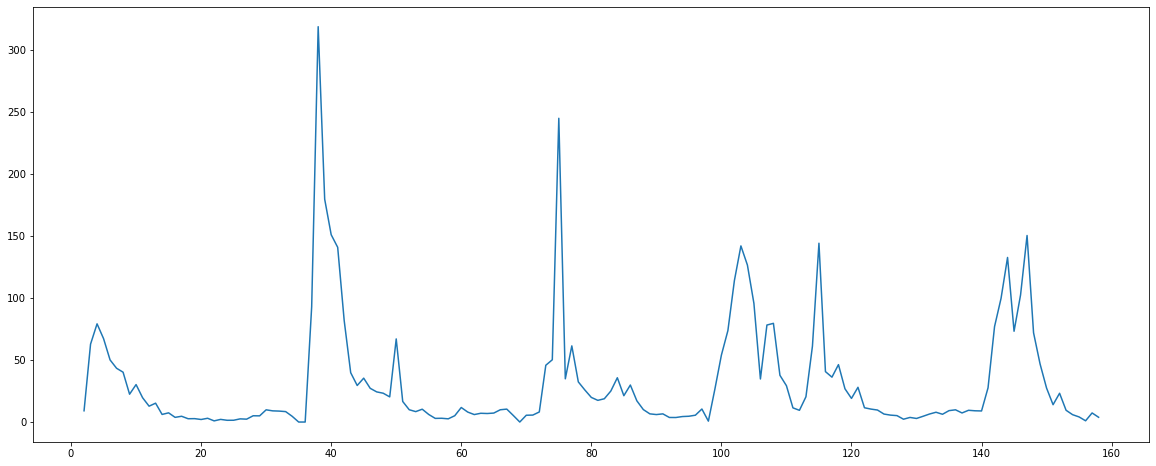

In [30]:
for i in range(nz):
    #print(H2[i])
    if np.isnan(H2[i]):
        dint_chla[i] = np.nan # in float used to write code, there were some nan for MLD because of no salinity values recorded
    else:
        jh = np.where( FLOAT.gr["depth"]>= H2[i])[0][0] # gets the depth index for the maxmum mixed layer
        #print(jh)
        #depth integrated nitrate/POC
        dint_chla[i] = np.nansum(FLOAT.gr["Chl_a"][:jh,i], axis = 0)*5 # i think multiply by 5 to account for the size of each grid bin (dz=5) 

#print(dint_chla, "mg m$^{-2}$")
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(dint_chla)

18.239229605751877


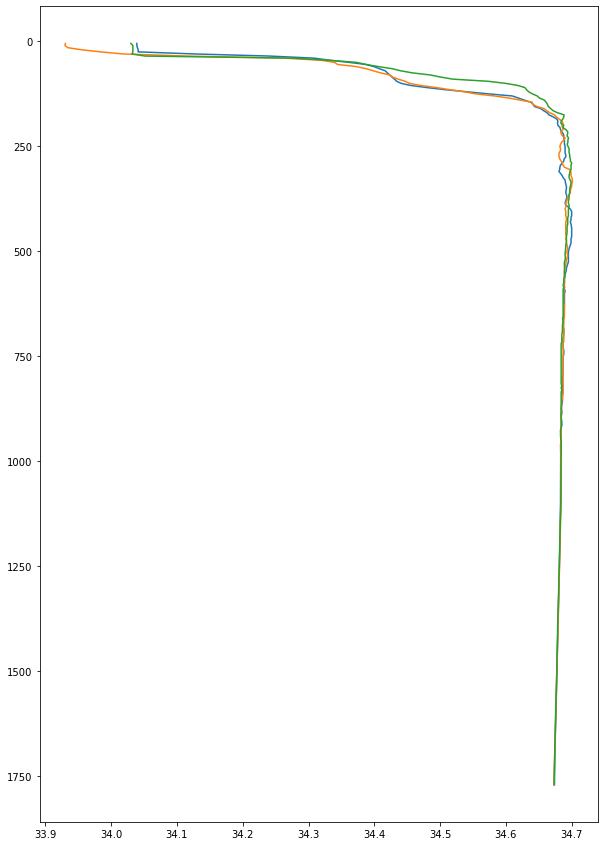

In [38]:
print(H2[143]) # for testing why nans were present in MLD values on previous floats
fig2, ax2 = plt.subplots(figsize = (10, 15))
ax=plt.plot(FLOAT.gr["Salinity"][:,142:145],FLOAT.gr["depth"])
plt.gca().invert_yaxis()


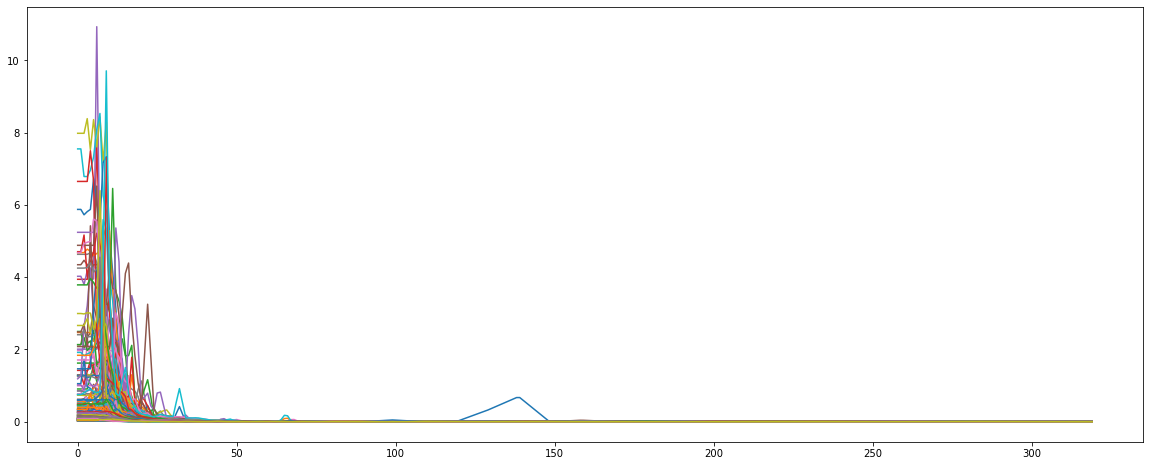

In [39]:
fig2, ax2 = plt.subplots(figsize = (20, 8))
ax=plt.plot(nitr_int_21.T)
